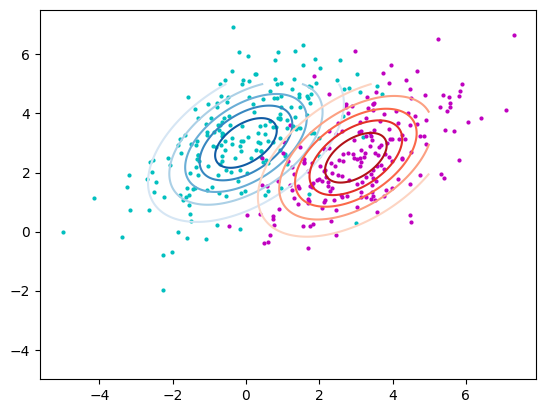

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(Ci)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num / den


def twoDGaussianPlot (nx, ny, m, C):
  x = np.linspace(-5, 5, nx)
  y = np.linspace(-5, 5, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')
  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  x = np.linspace(-5, 5, nx)
  y = np.linspace(-5, 5, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')
  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      num = P1*gauss2D(xvec, m1, C1)
      den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
      Z[i,j] = num / den
  return X, Y, Z

NumDataPerClass = 200

#Case 1
m11 = np.array([0,3])
m21 = np.array([3,2.5])
C11 = np.array([[2, 1], [1, 2]])
C21 = np.array([[2, 1], [1, 2]])
P11 = 0.5
P21 = 0.5
nx, ny = 200, 200

X1, Y1, Z1 = posteriorPlot(nx,ny,m11,C11,m21,C21,P11,P21)

A = np.linalg.cholesky(C11)
U1 = np.random.randn(NumDataPerClass,2)
X = U1 @ A.T + m11
U2 = np.random.randn(NumDataPerClass,2)
Y = U2 @ A.T + m21

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m11, C11)
plt.contour(Xp, Yp, Zp, 5, cmap='Blues')

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m21, C21)
plt.contour(Xp, Yp, Zp, 5, cmap='Reds')

A = np.linalg.cholesky(C11)
U1 = np.random.randn(NumDataPerClass,2)
X = U1 @ A.T + m11
U2 = np.random.randn(NumDataPerClass,2)
Y = U2 @ A.T + m21

plt.scatter(X[:,0], X[:,1], c="c", s=4)
plt.scatter(Y[:,0], Y[:,1], c="m", s=4)

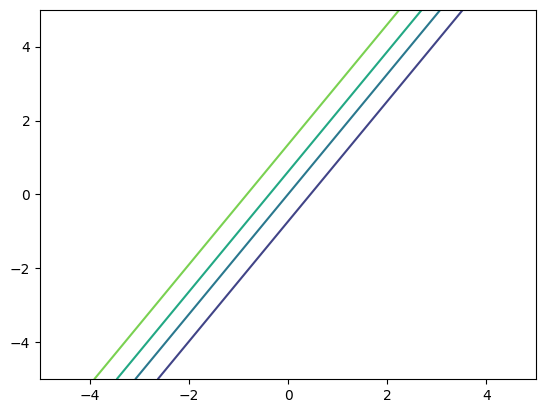

In [ ]:
#Case 1

plt.contour(X1, Y1, Z1, 5)

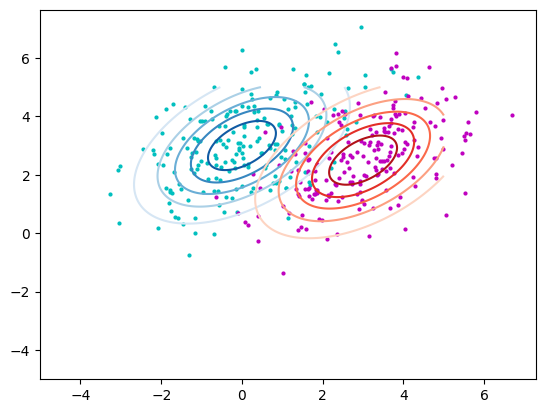

In [7]:
#Case 2
m12 = np.array([0,3])
m22 = np.array([3,2.5])
C12 = np.array([[2, 1], [1, 2]])
C22 = np.array([[2, 1], [1, 2]])
P12 = 0.7
P22 = 0.3
nx, ny = 200, 200

X2, Y2, Z2 = posteriorPlot(nx,ny,m12,C12,m22,C22,P12,P22)

A = np.linalg.cholesky(C12)
U1 = np.random.randn(NumDataPerClass,2)
X = U1 @ A.T + m12
U2 = np.random.randn(NumDataPerClass,2)
Y = U2 @ A.T + m22

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m12, C12)
plt.contour(Xp, Yp, Zp, 5, cmap='Blues')

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m22, C22)
plt.contour(Xp, Yp, Zp, 5, cmap='Reds')

A = np.linalg.cholesky(C12)
U1 = np.random.randn(NumDataPerClass,2)
X = U1 @ A.T + m12
U2 = np.random.randn(NumDataPerClass,2)
Y = U2 @ A.T + m22

plt.scatter(X[:,0], X[:,1], c="c", s=4)
plt.scatter(Y[:,0], Y[:,1], c="m", s=4)


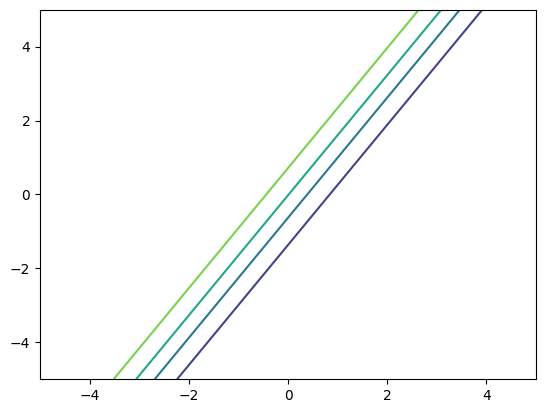

In [6]:
plt.contour(X2, Y2, Z2, 5)

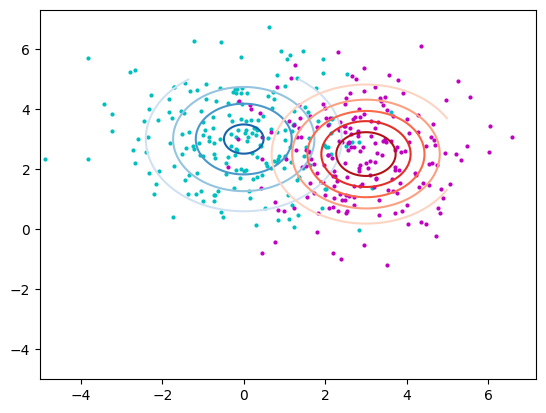

In [8]:
#Case 3
m13 = np.array([0,3])
m23 = np.array([3,2.5])
C13 = np.array([[2, 0], [0, 2]])
C23 = np.array([[1.5, 0], [0, 1.5]])
P13 = 0.5
P23 = 0.5
nx, ny = 200, 200

X3, Y3, Z3 = posteriorPlot(nx,ny,m13,C13,m23,C23,P13,P23)

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m13, C13)
plt.contour(Xp, Yp, Zp, 5, cmap='Blues')

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m23, C23)
plt.contour(Xp, Yp, Zp, 5, cmap='Reds')

A = np.linalg.cholesky(C13)
U1 = np.random.randn(NumDataPerClass,2)
X = U1 @ A.T + m13
U2 = np.random.randn(NumDataPerClass,2)
Y = U2 @ A.T + m23

plt.scatter(X[:,0], X[:,1], c="c", s=4)
plt.scatter(Y[:,0], Y[:,1], c="m", s=4)


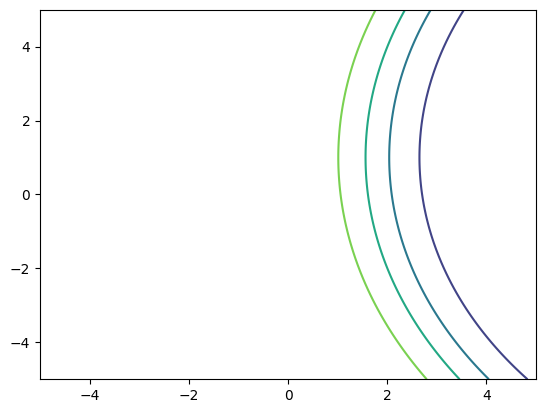

In [9]:
plt.contour(X3, Y3, Z3, 5)

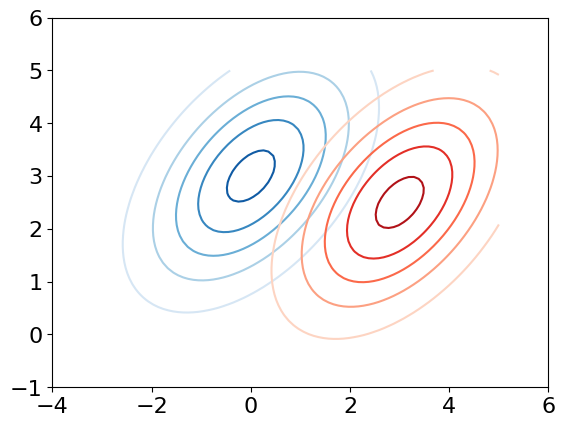

In [ ]:
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])

plt.axis([-4, 6, -1, 6])

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5, cmap='Blues')

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5, cmap='Reds')

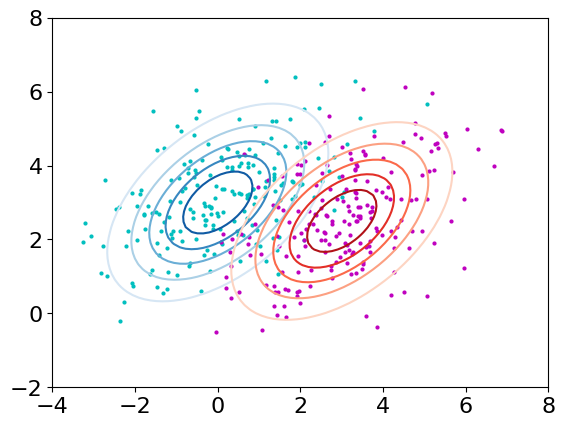

In [ ]:
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])
P1 = P2 = 0.5

plt.axis([-4, 8, -2, 8])

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5, cmap='Blues')

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5, cmap='Reds')

A = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass,2)
X = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
Y = U2 @ A.T + m2

plt.scatter(X[:,0], X[:,1], c="c", s=4)
plt.scatter(Y[:,0], Y[:,1], c="m", s=4)

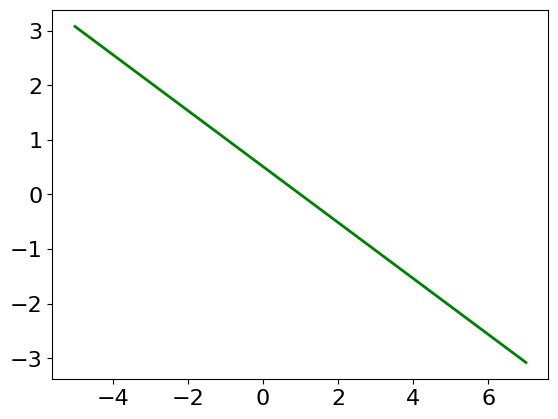

In [ ]:
Ci = np.linalg.inv(C1+C2)
wF = Ci @ (m2-m1)

x = np.linspace(-5, 5, NumDataPerClass)
y = np.linspace(-5, 5, NumDataPerClass)
xx = np.linspace(-5,7, NumDataPerClass)
yy = (wF[1]/wF[0])*x

plt.plot(xx, yy, color='green', linestyle='-', linewidth=2, label='Fisher Linear Discriminant')

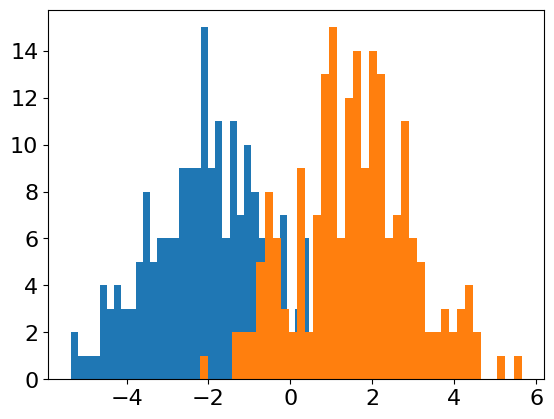

In [ ]:
uF = Ci @ (m2-m1)
yp1 = X @ uF
yp2 = Y @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

-5.364347838045448 5.642040142339942


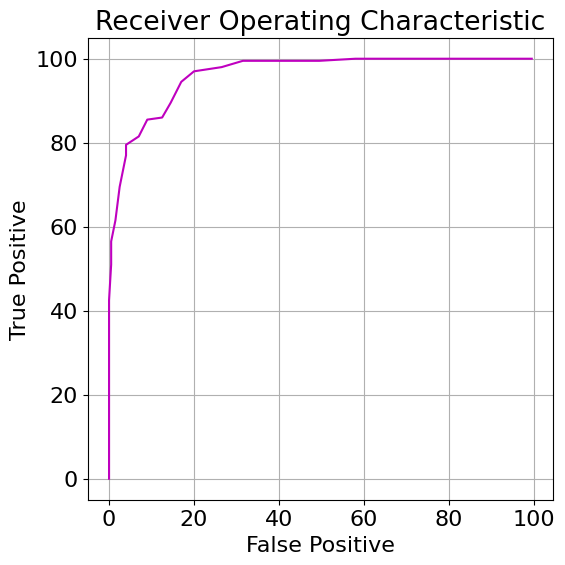

In [ ]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristic')
ax.grid(True)
plt.savefig('rocCurve.png')

In [ ]:
RT = np.zeros((nRocPoints, 2))

for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP, FP]
    tptn = len(yp2[yp2 > thresh])+len(yp1[yp1 < thresh])
    ac = (tptn/(len(yp2)+len(yp1))) * 100
    RT[i,:] = [ac, thresh]

print('max : ', np.max(RT[:,0]), '/ max threshold: ', thRange[np.argmax(RT[:,0])])


AUC = -np.trapz(ROC[:,0], x=ROC[:,1])
print('AUC : ', AUC)

max :  88.75 / max threshold:  -0.64732441788028
AUC :  9575.5


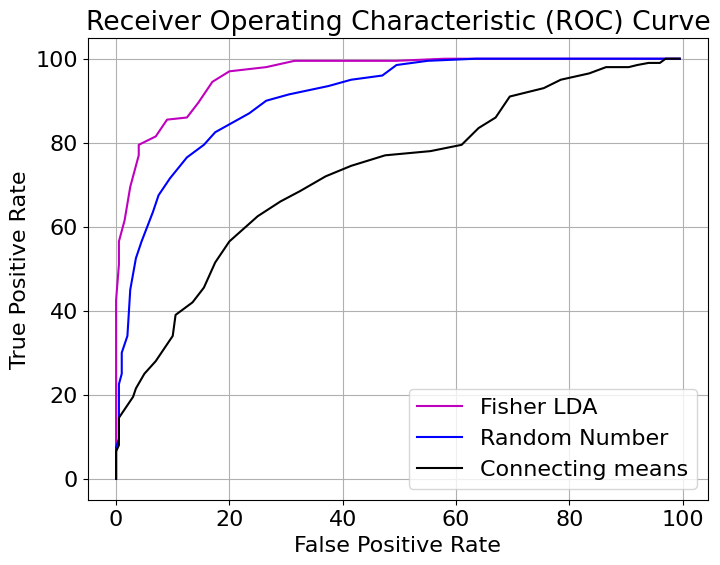

In [ ]:
uF_rdm = np.random.rand(2, )
uF_m = np.array(((m1[1]-m2[1]), (m1[0]-m2[0])))

yp1_r = X @ uF_rdm
yp2_r = Y @ uF_rdm

yp1_m = X @ uF_m
yp2_m = Y @ uF_m
#print('uF_rdm: ', uF_rdm, 'uF: ', uF, 'uF_m: ', uF_m)

pmin_r = np.min( np.array( (np.min(yp1_r), np.min(yp2_r) )))
pmax_r = np.max( np.array( (np.max(yp1_r), np.max(yp2_r) )))

pmin_m = np.min( np.array( (np.min(yp1_m), np.min(yp2_m) )))
pmax_m = np.max( np.array( (np.max(yp1_m), np.max(yp2_m) )))

thRange_r = np.linspace(pmin_r, pmax_r, nRocPoints) # create space
ROC_r = np.zeros( (nRocPoints, 2) ) # make nRocPoints X 2 matrix

thRange_m = np.linspace(pmin_m, pmax_m, nRocPoints) # create space
ROC_m = np.zeros( (nRocPoints, 2) ) # make nRocPoints X 2 matrix

for i in range(len(thRange)): # iterate 50 times
    thresh_r = thRange_r[i] # threshold pmin ~ pmax interval : 50
    thresh_m = thRange_m[i] # threshold pmin ~ pmax interval : 50

    TP_r = len(yp2_r[yp2_r > thresh_r]) * 100 / len(yp2_r) # it sees Y2 is positive
    FP_r = len(yp1_r[yp1_r > thresh_r]) * 100 / len(yp1_r)

    TP_m = len(yp2_m[yp2_m > thresh_m]) * 100 / len(yp2_m) # it sees Y2 is positive
    FP_m = len(yp1_m[yp1_m > thresh_m]) * 100 / len(yp1_m)

    ROC_r[i,:] = [TP_r, FP_r] # random
    ROC_m[i,:] = [TP_m, FP_m] # means

plt.figure(figsize=(8, 6))
plt.plot(ROC[:,1], ROC[:,0], c='m', label='Fisher LDA')
plt.plot(ROC_r[:,1], ROC_r[:,0], c='b', label='Random Number')
plt.plot(ROC_m[:,1], ROC_m[:,0], c='k', label='Connecting means')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Compute AUC for the Fisher LDA
AUC_fisher = -np.trapz(ROC[:,0], x=ROC[:,1])
print('AUC (Fisher LDA):', AUC_fisher)

# Compute AUC for the random direction
AUC_random = -np.trapz(ROC_r[:,0], x=ROC_r[:,1])
print('AUC (Random direction):', AUC_random)

# Compute AUC for the direction connecting the means
AUC_means = -np.trapz(ROC_m[:,0], x=ROC_m[:,1])
print('AUC (Connecting means):', AUC_means)

AUC (Fisher LDA): 9575.5
AUC (Random direction): 9035.875
AUC (Connecting means): 7248.625
